
# 🌼 자연어처리 기초 - 2차시(24.11.11)

---


## 1. 워드클라우드
- 주어진 텍스트 데이터에서 단어의 중요도나 빈도를 시각화하는 도구
- 텍스트에서 가장 많이 등장하는 단어일수록 큰 글자로 표시
- 단어의 크기는 단어가 나타난 빈도에 비례
- 주요 데이터를 한눈에 파악하기O

In [257]:
# pip install wordcloud


In [258]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [259]:
text = "Python is a powerful programming language. Python is great for data analysis and visualization."

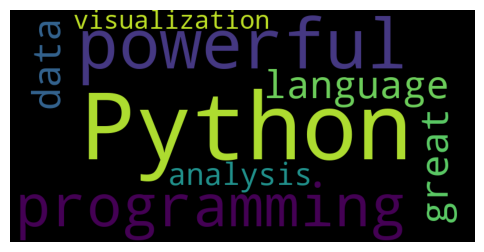

In [260]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 자연어 분류

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [262]:
# 학습, 예측 데이터셋을 불러온다.
train = pd.read_csv('../data/open/train_data.csv')
test = pd.read_csv('../data/open/test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [263]:
topic = pd.read_csv('../data/open/topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [264]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [265]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [266]:
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [267]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [268]:
df = raw.merge(topic, how='left') # raw에 있는 행을 모두 유지하고 토픽 페이퍼가 로우와 일치하는 경우에만 입력하고 아니면 nan값
df.shape

(54785, 4)

In [269]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [270]:
df.tail()

,index,title,topic_idx,topic
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN


In [271]:
df['topic_idx'].value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

<Axes: xlabel='count', ylabel='topic'>

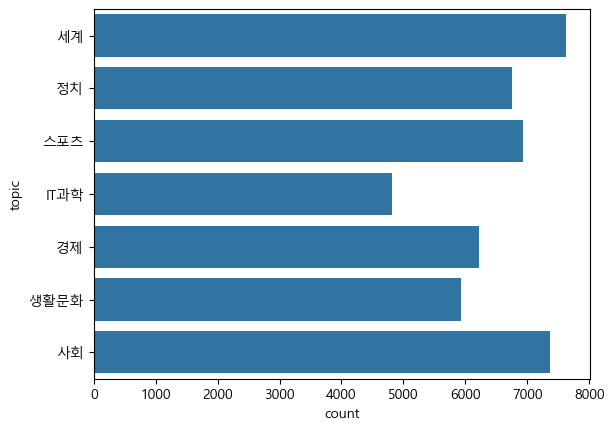

In [273]:
sns.countplot(data = df, y='topic')

### 파생변수 만들기
1. 문자 길이
2. 문장을 띄어쓰기 기준으로 스플릿한 길이
3. 중복값을 제거한 2번

In [274]:
df['len'] = df['title'].apply(lambda x : len(x))
# len 열 : title의 길이

In [275]:
df['word_count'] = df['title'].apply(lambda x : len(x.split()))
# word_count열 : 띄어쓰기 기준으로 스플릿된 길이

In [276]:
df['unique_word_count'] = df['title'].apply(lambda x : len(set(x.split()))) # set : 중복값 제거


In [277]:
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<Axes: xlabel='unique_word_count', ylabel='Count'>

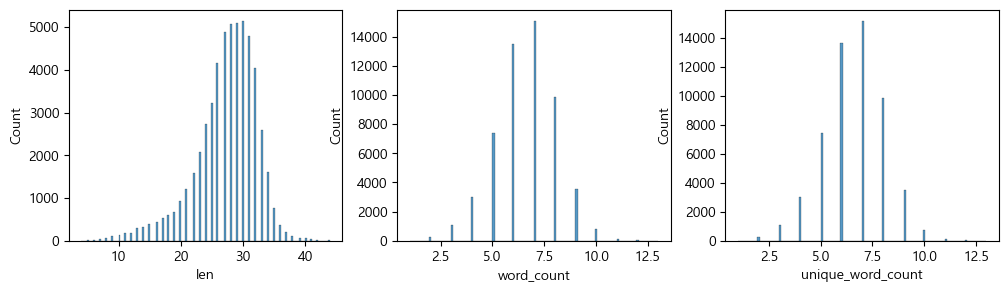

In [278]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(df['len'], ax=axes[0])
sns.histplot(df['word_count'], ax=axes[1])
sns.histplot(df['unique_word_count'], ax=axes[2])

In [279]:
df[['len','word_count','unique_word_count']].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


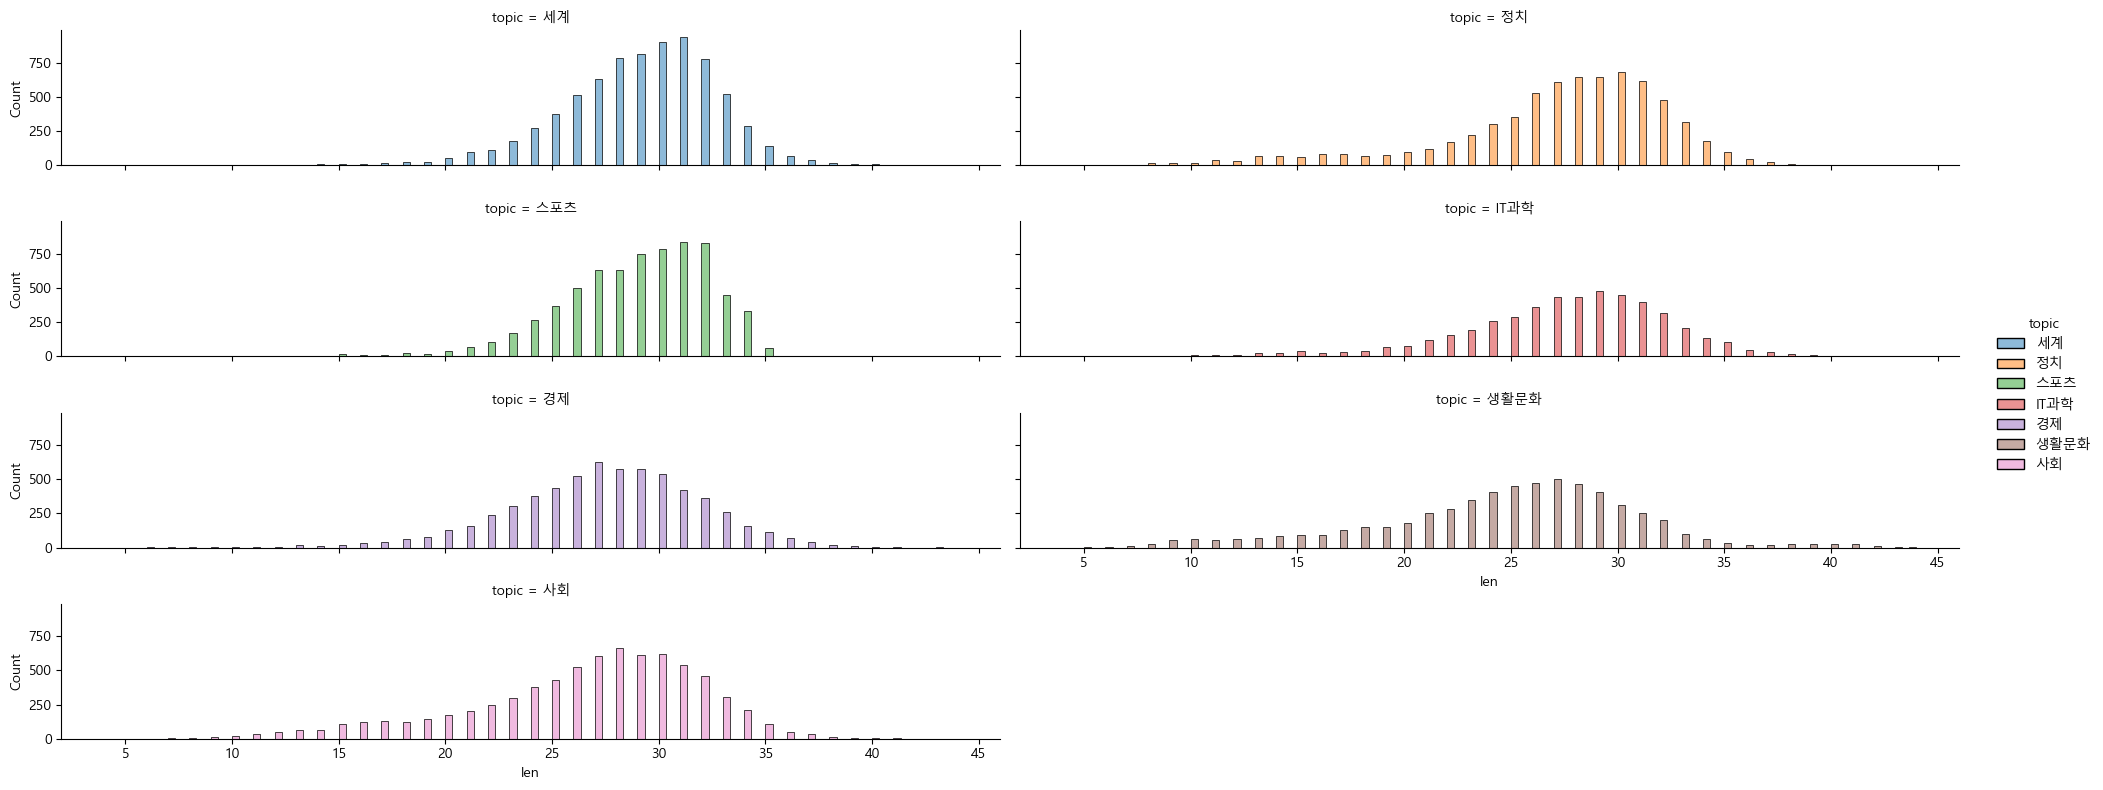

In [280]:
sns.displot(data = df, x = 'len', hue = 'topic', col='topic',col_wrap = 2, aspect = 5, height = 2)

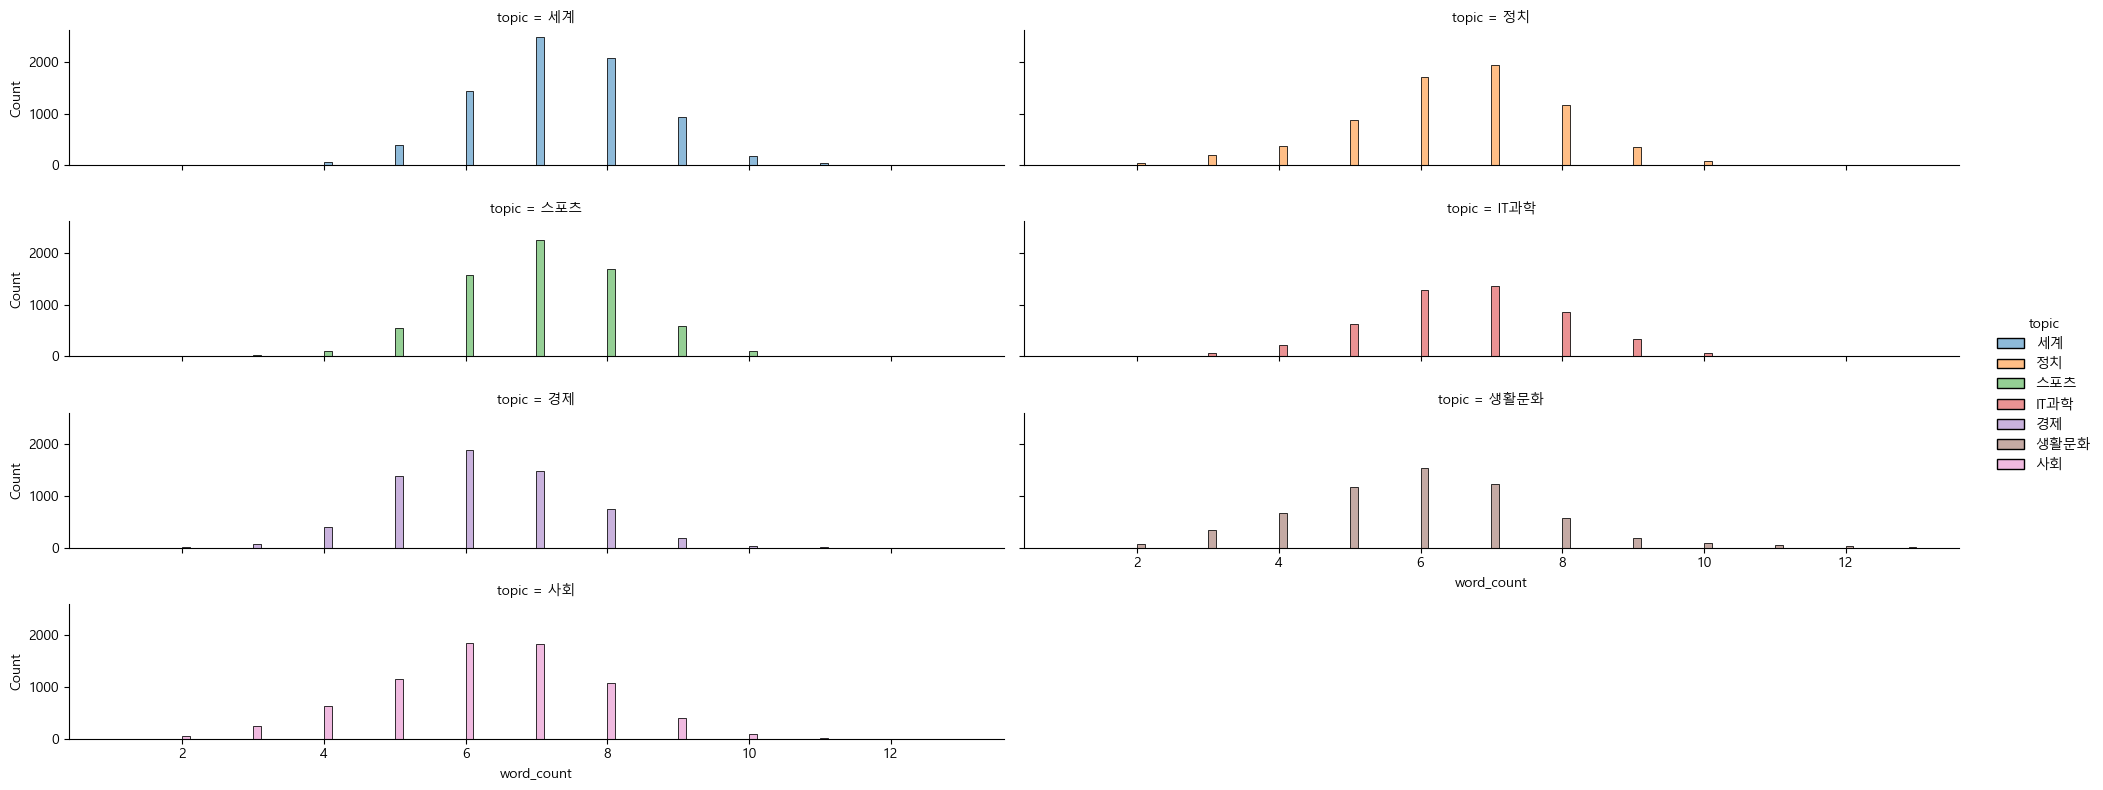

In [281]:
sns.displot(data = df, x = 'word_count', hue = 'topic', col='topic',col_wrap = 2, aspect = 5, height = 2)

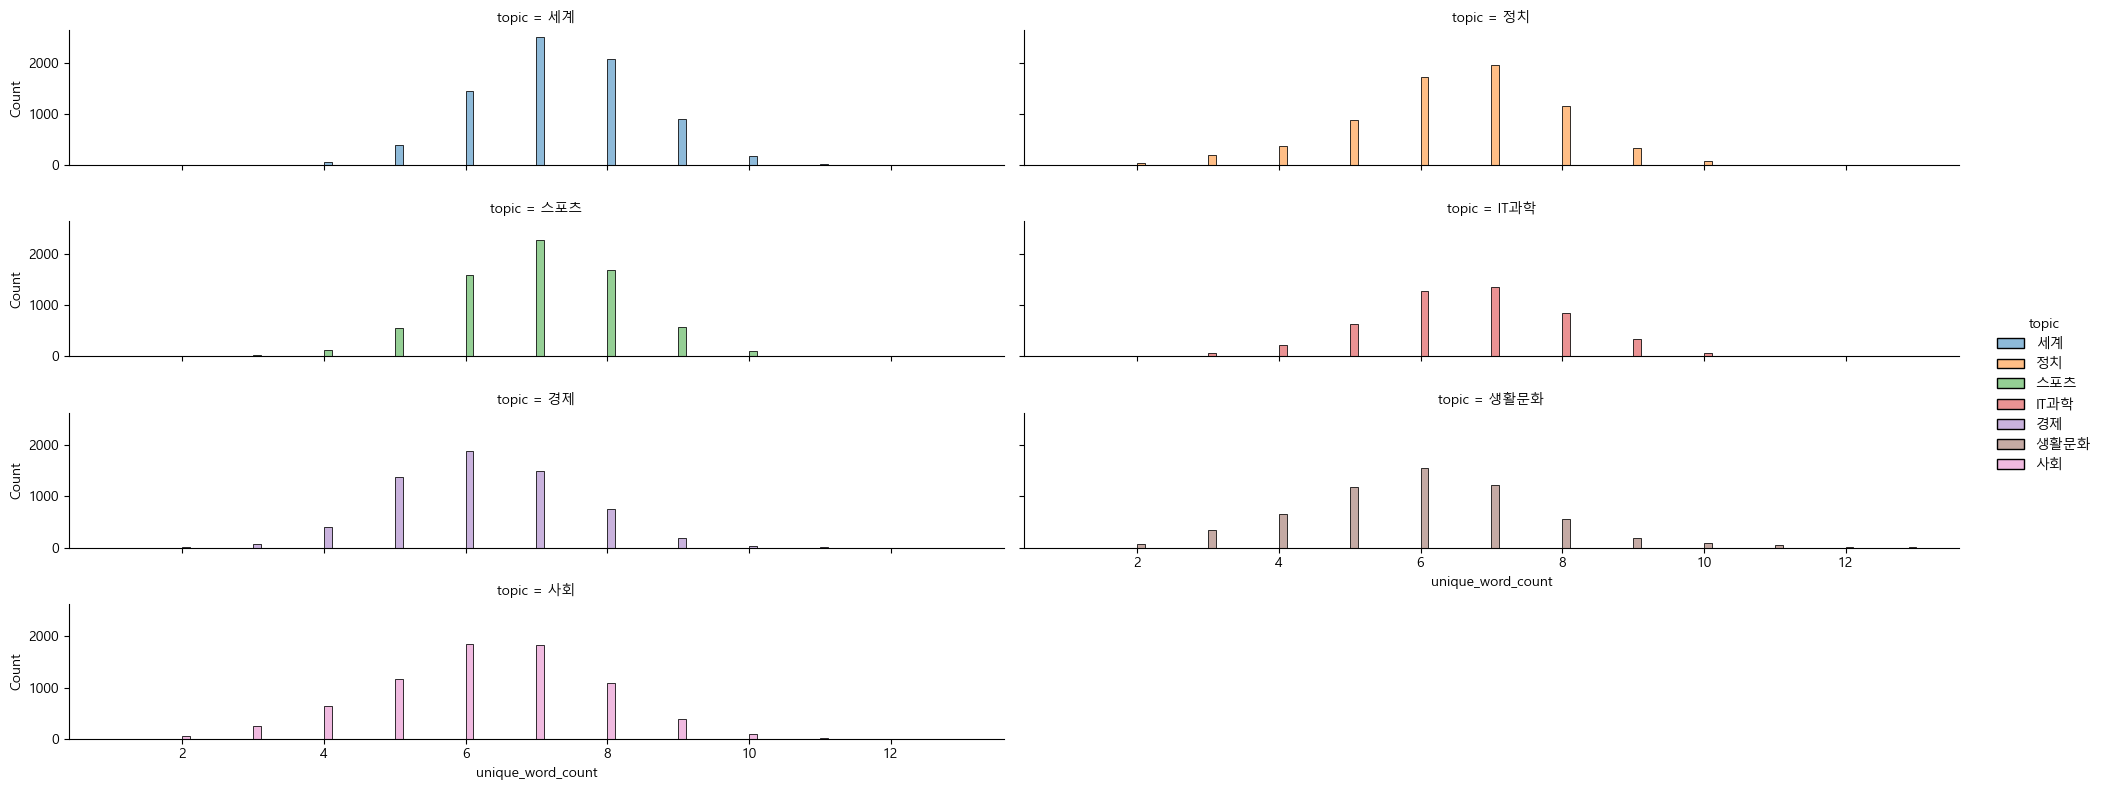

In [282]:
sns.displot(data = df, x = 'unique_word_count', hue = 'topic', col='topic',col_wrap = 2, aspect = 5, height = 2)

### 전처리

In [283]:
import re
df['title'] = df['title'].map(lambda x: re.sub('[0-9]', '', x))

In [284]:
df['title'] = df['title'].str.lower()
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,nyt 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


In [285]:
def remove_stopword(text):
    tokens = text.split(' ')
    stops = ['하다', '한다', '합니다','할','하는', '그리고', '입니다','그','등','이런','저런','것','및','더'] # 낱글자들을 넣어 주는게 좋다
    meaningful_words = []
    for w in tokens :
        if w not in stops:
            meaningful_words.append(w)
    return ' '.join(meaningful_words)

In [286]:
df['title'] = df['title'].apply(remove_stopword)
df.tail() # 마지막 5개 행

,index,title,topic_idx,topic,len,word_count,unique_word_count
54780,54780,인천 오후 시분 대설주의보…눈 .cm 쌓여,NaN,NaN,28,6,6
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7
54782,54782,년 전 부마항쟁 부산 시위 사진 점 최초 공개,NaN,NaN,28,9,9
54783,54783,게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6
54784,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN,NaN,31,7,7


In [287]:
label_name = 'topic_idx'

In [288]:
train = df[df[label_name].notnull()].copy()
test = df[df[label_name].isnull()].copy()

In [289]:
train.shape, test.shape

((45654, 7), (9131, 7))

In [290]:
from konlpy.tag import Okt
okt = Okt()

In [291]:
def okt_clean(text):
    clean_text = []
    # .pos -> {단어 : 품사} 
    for word in okt.pos(text, stem=True): # 형태소로 분류 하고 품사태그를 붙여준다 
        # norm=True: 문장의 정규화를 수행합니다. (예: "잼있다" -> "재미있다")
        # stem=True: 단어를 기본형으로 변환합니다. (예: "마셨다" -> "마시다")
        if word[1] not in ['Josa', 'Eomi', 'Punctcuation']:
            clean_text.append(word[0])
    return ' '.join(clean_text)

In [292]:
from tqdm import tqdm
tqdm.pandas()

In [293]:
test['title']

45654          유튜브 내달 일까지 크리에이터 지원 공간 운영
45655            어버이날 맑다가 흐려져…남부지방 옅은 황사
45656        내년부터 국가rd 평가 때 논문건수는 반영 않는다
45657      김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을
45658        회색인간 작가 김동식 양심고백 새 소설집 권 출간
                      ...               
54780            인천 오후 시분 대설주의보…눈 .cm 쌓여
54781      노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782          년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783      게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784    유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 9131, dtype: object

In [294]:
train['title'] = train['title'].progress_map(okt_clean) # .progress_map -> 함수의 진행상황을 바로 보여주는 함수
test['title'] = test['title'].progress_map(okt_clean)

100%|██████████| 9131/9131 [00:22<00:00, 408.08it/s]


In [295]:
train.head(10)

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천 → 핀란드 항공기 결항 … 휴가 철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서다 … 구글 조원 들이다 美 전역 거점 화,4.0,세계,30,6,6
2,2,이란 외무 긴장 완화 해결 책 미국 경제 전쟁 멈추다,4.0,세계,30,8,8
3,3,nyt 클린턴 측근 韓 기업 특수 관계 조명 … 공과 사 맞다 물리다 종합,4.0,세계,32,7,7
4,4,시진핑 트럼프 중미 무역 협상 조속 타결 희망,4.0,세계,25,7,7
5,5,팔레스타인 가자지구 세 소년 이스라엘군 총격 사망,4.0,세계,31,7,7
6,6,인도 년 파키스탄 공습 … 테러 캠프 폭격 종합 보,4.0,세계,30,7,7
7,7,美 대선 tv 토론 음담패설 만회 실패 트럼프 … 사과 대신 빌다 클린턴 공격 하다...,4.0,세계,41,9,9
8,8,푸틴 한반도 상황 진전 위 방안 김정은 위원장 논의,4.0,세계,30,9,9
9,9,특검 면죄부 받다 트럼프 스캔들 보도 언론 맹공 … 국민 적,4.0,세계,32,9,9


In [383]:
X_train = train['title']
X_test = test['title']

In [297]:
y_train = train[label_name]
y_train.value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [298]:
y_test = test[label_name]
y_test.value_counts()

Series([], Name: count, dtype: int64)

In [299]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 자연어 처리 -> 자연어, 처리, 자연어처리
tfidf_vect = TfidfVectorizer(tokenizer=None, ngram_range=(1, 2), min_df= 3, max_df= 0.95)

In [300]:
tfidf_vect.fit(X_train)

TfidfVectorizer(max_df=0.95, min_df=3, ngram_range=(1, 2))

In [301]:
X_train.shape, X_test.shape

((45654,), (9131,))

In [302]:
train_feature_tfidf = tfidf_vect.transform(X_train)
test_feature_tfidf = tfidf_vect.transform(X_test)

In [303]:
train_feature_tfidf.shape, test_feature_tfidf.shape

((45654, 26053), (9131, 26053))

In [304]:
vocab = tfidf_vect.get_feature_names_out()
print(len(vocab))

26053


In [305]:
vocab[:10]

array(['aa', 'abs', 'abu', 'ac', 'ac 밀란', 'acl', 'acl 차다', 'afc',
       'afc 챔스리그', 'afc 챔피언스리그'], dtype=object)

In [306]:
vocab[26000:26050]

array(['흥국생명 통합', '흥분', '흥정', '흥행', '희곡', '희귀', '희다', '희망', '희망 보다',
       '희망 브리지', '희망 일자리', '희망 재단', '희망 종합', '희망 퇴직', '희비', '희생', '희생 추모',
       '희생 플라이', '희영', '희종', '희토류', '흰색', '히딩크', '히로', '히로시마', '히말라야',
       '히스패닉', '히어로', '히어로즈', '히어로즈 대표', '히어로즈 스폰서', '히잡', '히트', '히트 게임',
       '히틀러', '힌두', '힐러리', '힐러리 vs', '힐러리 건강', '힐러리 몰다', '힐러리 사우스캐롤라이나',
       '힐러리 샌더스', '힐러리 이메일', '힐러리 지지', '힐러리 트럼프', '힐링', '힘겹다', '힘내다',
       '힘드다', '힘들다'], dtype=object)

In [307]:
train_feature_tfidf.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [308]:
dist = np.sum(train_feature_tfidf, axis = 0)
dist

matrix([[1.63870401, 1.44835092, 1.44364459, ..., 1.31628288, 1.81502518,
         2.35683837]])

In [309]:
vocab_count = pd.DataFrame(dist, columns=vocab)
vocab_count

,aa,abs,abu,ac,ac 밀란,acl,acl 차다,afc,afc 챔스리그,afc 챔피언스리그,...,힐러리 지지,힐러리 트럼프,힐링,힘겹다,힘내다,힘드다,힘들다,힘쓰다,힘차다,힙합
0,1.638704,1.448351,1.443645,1.178914,1.178914,4.714391,1.368398,10.477363,3.615439,1.249048,...,1.159541,9.293351,5.925178,1.924272,3.960518,5.230625,10.003089,1.316283,1.815025,2.356838


<Axes: >

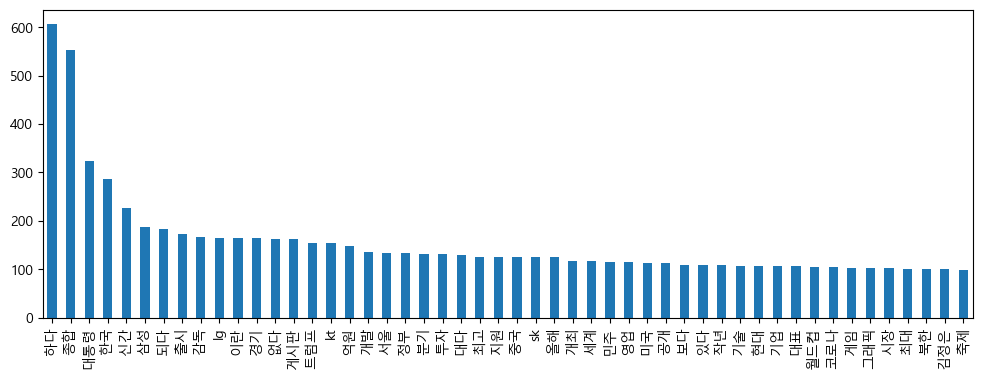

In [310]:
vocab_count.T[0].sort_values(ascending=False).head(50).plot.bar(figsize=(12, 4)) # 가로의 데이터를 세로로 나열

In [315]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [316]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, train_feature_tfidf, y_train, cv = 3, verbose=1 )

In [317]:
y_pred == y_train

0        False
1        False
2         True
3        False
4         True
         ...  
45649     True
45650     True
45651     True
45652     True
45653     True
Name: topic_idx, Length: 45654, dtype: bool

In [318]:
valid_accuracy = (y_pred == y_train).mean() # 대략적인 정확도
valid_accuracy # 여기까지는 검증!!

0.7706225084329961

In [319]:
df_accuracy = pd.DataFrame({'predict' : y_pred, 'train' : y_train})
df_accuracy['accuracy'] = (y_pred == y_train)
df_accuracy

,predict,train,accuracy
0,2.0,4.0,False
1,1.0,4.0,False
2,4.0,4.0,True
3,6.0,4.0,False
4,4.0,4.0,True
...,...,...,...
45649,1.0,1.0,True
45650,2.0,2.0,True
45651,1.0,1.0,True
45652,2.0,2.0,True


In [320]:
# 각 토픽별로 학습이 잘 되었는지
df_accuracy.groupby(['predict'])['accuracy'].mean()

predict
0.0    0.663781
1.0    0.794926
2.0    0.636527
3.0    0.752356
4.0    0.847333
5.0    0.924963
6.0    0.775456
Name: accuracy, dtype: float64

In [321]:
%time model.fit(train_feature_tfidf, y_train)

CPU times: total: 6min 12s
Wall time: 8min 57s


RandomForestClassifier(random_state=42)

In [322]:
y_predict = model.predict(test_feature_tfidf)
y_predict[:5]

array([2., 3., 0., 2., 3.])

In [323]:
submit = pd.read_csv('../data/open/sample_submission.csv')
submit.head() # 예측해야할 결과 값

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0


In [325]:
submit['topic_idx']

0       0
1       0
2       0
3       0
4       0
       ..
9126    0
9127    0
9128    0
9129    0
9130    0
Name: topic_idx, Length: 9131, dtype: int64

In [329]:
final = pd.DataFrame({
    '예측값' : y_predict,
    # '실제값' : # 실제값이 없으므로 여기서 종료
})
final

,예측값
0,2.0
1,3.0
2,0.0
3,2.0
4,3.0
...,...
9126,3.0
9127,6.0
9128,4.0
9129,0.0



## 🌼마무리 문제

Q. 국민청원 데이터로 응답 여부 0과 1로 이진분류하기
- 전체 데이터 중 투표(votes)가 500건 이상인 데이터만 사용하되 20만건 이상인 데이터셋을 제외하고 사용합니다
- 투표수가 전체 평균보다 크면 1, 적으면 0으로 분류될 수 있도록 전처리하고 모델을 통해 예측합니다

In [333]:
petitions = pd.read_csv('../data/petition.csv')
petitions.head()
petitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article_id  395547 non-null  int64 
 1   start       395547 non-null  object
 2   end         395547 non-null  object
 3   answered    395547 non-null  int64 
 4   votes       395547 non-null  int64 
 5   category    395547 non-null  object
 6   title       395547 non-null  object
 7   content     395546 non-null  object
dtypes: int64(3), object(5)
memory usage: 24.1+ MB


In [ ]:
filter_petitions = petitions[(petitions['votes'] >= 500) & (petitions['votes'] < 200000)]
filter_petitions


,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...
...,...,...,...,...,...,...,...,...
394876,516130,2019-02-03,2019-03-05,0,1499,문화/예술/체육/언론,대한민국 순국선열유족회 기관지 월간 <순국>지가 폐간되지 않게 해주세요.,지령 336호 월간 <순국>이 폐간 위기에 놓였습니다.\n<순국>지는 사단법인 '대...
395247,516667,2019-02-04,2019-03-06,0,3353,경제민주화,악덕기업 화승 4달치 판매대금 불법으로 어음주고 수백명 매니져들한테 떠넘기고 회...,k스위스 르까프 머렐 화승 3개 브렌드 매니져들한테 판매대금 어...
395352,516820,2019-02-04,2019-03-06,0,4930,인권/성평등,섬에서 갇혀살아가는 성매매여성들을 도와주세요.,섬에 다방이나 성매매 업자들에게 과한 빚이나 폭력으로 묶여 삶을 유린당하는 여성들이...
395407,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...


In [ ]:
print(filter_petitions)
means = filter_petitions['votes'].mean()
print(means)

filter_petitions['label'] = (filter_petitions['votes'] > means).astype(int)
filter_petitions['label']


        article_id       start         end  answered  votes     category  \
7               28  2017-08-19  2017-08-26         0   2137        경제민주화   
13              34  2017-08-19  2017-09-18         0    679           기타   
21              43  2017-08-19  2017-09-18         0  11293        육아/교육   
24              46  2017-08-19  2017-09-18         0   1933        육아/교육   
28              50  2017-08-19  2017-10-18         0   1251          일자리   
...            ...         ...         ...       ...    ...          ...   
394876      516130  2019-02-03  2019-03-05         0   1499  문화/예술/체육/언론   
395247      516667  2019-02-04  2019-03-06         0   3353        경제민주화   
395352      516820  2019-02-04  2019-03-06         0   4930       인권/성평등   
395407      516901  2019-02-04  2019-03-06         0    718     외교/통일/국방   
395488      517037  2019-02-04  2019-03-06         0    938       인권/성평등   

                                                    title  \
7                         

C:\Users\RMARKET\AppData\Local\Temp\ipykernel_3096\4008411095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_petitions['label'] = (filter_petitions['votes'] > means).astype(int)


7         0
13        0
21        1
24        0
28        0
         ..
394876    0
395247    0
395352    0
395407    0
395488    0
Name: label, Length: 5319, dtype: int32

In [ ]:
filter_petitions

,article_id,start,end,answered,votes,category,title,content,label
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",1
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0
...,...,...,...,...,...,...,...,...,...
394876,516130,2019-02-03,2019-03-05,0,1499,문화/예술/체육/언론,대한민국 순국선열유족회 기관지 월간 <순국>지가 폐간되지 않게 해주세요.,지령 336호 월간 <순국>이 폐간 위기에 놓였습니다.\n<순국>지는 사단법인 '대...,0
395247,516667,2019-02-04,2019-03-06,0,3353,경제민주화,악덕기업 화승 4달치 판매대금 불법으로 어음주고 수백명 매니져들한테 떠넘기고 회...,k스위스 르까프 머렐 화승 3개 브렌드 매니져들한테 판매대금 어...,0
395352,516820,2019-02-04,2019-03-06,0,4930,인권/성평등,섬에서 갇혀살아가는 성매매여성들을 도와주세요.,섬에 다방이나 성매매 업자들에게 과한 빚이나 폭력으로 묶여 삶을 유린당하는 여성들이...,0
395407,516901,2019-02-04,2019-03-06,0,718,외교/통일/국방,대한민국 예비역 장성모임(성우회)를 구성하고 있는 전직 고위장성들의 연금을 박탈하고...,올해는 3.1운동과 임시정부 수립 100주년을 맞는 해입니다. 더구나 시민들의 촛불...,0


In [ ]:
from sklearn.model_selection import train_test_split

# train과 test 데이터셋을 80:20 비율로 분할
train_, test_ = train_test_split(filter_petitions, test_size=0.2, random_state=42)

# 결과 확인
train_.shape, test_.shape
train_

,article_id,start,end,answered,votes,category,title,content,label
248025,321222,2018-07-27,2018-08-26,0,1336,육아/교육,대통령님의 육아정책에 역해하는 인천길병원의 횡포,"저는 길병원직원은 아니지만,지금 인천길병원에서는 현 기업노조에 무능함에 분노한 직원...",0
57788,60501,2017-12-07,2018-01-06,0,4781,육아/교육,늘어나는 신도시 신설학교 대책을 마련해주세요,신도시는 늘어나는데 지자체 교육청에서는 인구 노령화로 지속적으로 아이들이 줄어들...,0
1583,1613,2017-09-02,2017-12-01,0,10729,육아/교육,사립유치원 보육료 인상등 집회 반대합니다,전국 사립 유치원단은 무상교육이라는 명분하에 9월 18일 집회를 정당화하고 일부유치...,1
225329,291676,2018-07-01,2018-07-31,0,7631,외교/통일/국방,군인들의 의료권을 보장해주실 것을 청원합니다.,"tv 프로그램을 통해 군대에서 군인들의 의료권이 보장된지 못한채 의료 사고, 사망 ...",1
163173,201684,2018-04-16,2018-05-16,0,533,행정,임금피크제 폐지,임금피크제 폐지 동의합니다.,0
...,...,...,...,...,...,...,...,...,...
229682,297279,2018-07-05,2018-08-04,0,1582,저출산/고령화대책,난임병원가보셨나요?,안녕하세요 아이를가지고싶은30대 주부입니다 요즘 간간히 뉴스로 저출산이 많이 문제...,0
282625,367000,2018-09-05,2018-10-05,0,691,교통/건축/국토,이제 1주택자도 적폐인가요?,이제 1주택자도 적폐인가요?\n9월4일자 기사에 따르면\nhttp://naver.m...,0
384227,500744,2019-01-19,2019-02-18,0,690,보건복지,"요양원비리, 국민의 힘으로 바로 잡아주세요!","[요양원비리, 국민의 힘으로 바로 잡아주세요!]\n1월11일 추적60분 ""망하지 않...",0
388141,506336,2019-01-25,2019-02-24,0,528,보건복지,CRPS(복합부위통증증후군) 환자들을 도와주세요.,"안녕하십니까, 저는 그냥 평범한 학생입니다.\n하지만 최근 유튜브에서 CPRS 관련...",0


In [ ]:
X_train = train_['votes']
X_test = test_['votes']

In [334]:
## 풀이
remove_outlier = petitions.loc[(petitions['votes']>=500) & (petitions['votes']<=200000)]
remove_outlier['votes']

7          2137
13          679
21        11293
24         1933
28         1251
          ...  
394876     1499
395247     3353
395352     4930
395407      718
395488      938
Name: votes, Length: 5319, dtype: int64

In [335]:
df = remove_outlier.copy()
df.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...


In [336]:
df.loc[df['answered'] == 1].shape

(0, 8)

In [340]:
votes_mean = df['votes'].mean()
votes_mean

5653.366798270352

<Axes: ylabel='Frequency'>

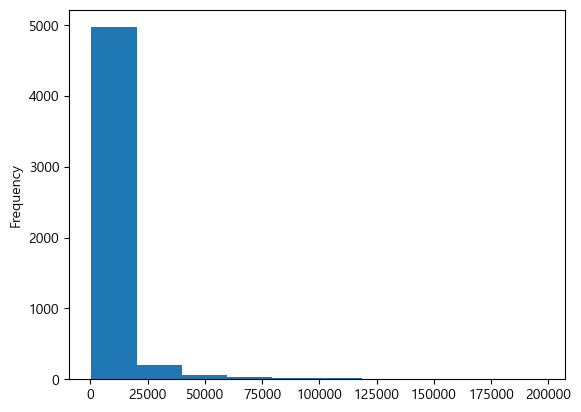

In [337]:
df['votes'].plot.hist()

In [338]:
df = df[['votes','title','content']].copy()
df.head()

,votes,title,content
7,2137,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
13,679,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
21,11293,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
24,1933,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
28,1251,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...


In [341]:
df['more_than_mean'] = (df['votes'] > votes_mean) == 1
df.head()

,votes,title,content,more_than_mean
7,2137,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,False
13,679,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,False
21,11293,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",True
24,1933,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",False
28,1251,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,False


In [342]:
df['more_than_mean'].dtype

dtype('bool')

In [343]:
df['more_than_mean'] = df['more_than_mean'].astype(int)
df.head()

,votes,title,content,more_than_mean
7,2137,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0
13,679,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0
21,11293,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",1
24,1933,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0
28,1251,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0


In [344]:
sample_title = df.loc[13, 'title']
sample_title

'『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 문제점 개선 청원'

In [345]:
sample_content = df.loc[13, 'content']
sample_content

'(현황)\\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨 을 바쳐 대한민국을 지켜내는데 헌신했습니다. 우리들 대부분의 아버님들 중 12만위는 전쟁 후 지금껏 유해도 수습 못했고 忌日도 제대로 알지 못하지만 오직 국가유공자의 자녀라는 자긍심으로 오랜 기간을 가난과 멸시 천대를 이겨왔습니다.\\n전후 원호제도는 빈약하여 전사자와 그 가족에 대한 보상과 연금 등은 너무 빈약했고,  그 후도 경제발전 수준을 따라가지도 못하였는데, 1960년대 말은 전쟁유자녀가 성년이 되었다는 이유로 보훈 보상혜택에서 제외시켰다가 김대중정부 시절 2001년7월부터 보훈제도가 확대되어 전후의 미흡했던 보훈혜택을 보전해주기 위해 1997년 12월31일을 기준으로 아래의 제적유자녀 1)와 승계유자녀 2)에게는 先順位자녀 1人에 대하여만「6ㆍ25전몰 군경자녀수당」을 지급하게 되었으나, 단서조항으로 1998년1월1일 이후 어머니 사망으로 연금수급권이 소멸되기 시작한 저희 유자녀들에 대하여는 동법 적용을 배제하여, 어머니 돌아가신 날 하루 차이로 “미수당유자녀” 아래표 3)라는 보훈정책의 사각지대가 생겨났던 것입니다.\\n신설된 수당과 유족연금이 노무현 정부이래 점차 현실화 인상 조정되고 이 문제가 장기간 누증되다보니\\n6.25전쟁에서 똑 같이 아버지가 전사한 군·경유자녀들인데, 누구는 국가의 지원을 받고 누구는 국가의 지원을 받지 못하는 형평성에 문제가 있는 『국가유공자 등 예우 및 지원에 관한 법률』제16조3(6.25자녀수당)의1,(단서조항 : 1998년 1월 1일을 삭제하는 법안)을 19대 국회에서 더민주당 민홍철 의원님(경남 김해)이 2014년 2월 대표발의 하시어 당시 여당의원 일부 반대의 우여곡절 끝에 전해철 법사위 소위원장님 등의 주도적 노력으로 2015년 11월30일 제337회 정기회에서 재석 의원 만장일치로 법이 통과되어 12월29일 법률 제13697호로 공포된바 있었습니다.\\n그럼에도 박근혜 정부는 동법 개정이유와 주요내용에서 입법부가 

In [346]:
import re
def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [347]:
def remove_stopword(text):
    tokens = text.split(' ')
    stop = ['습니다', '있는', '있습니다', '않습니다', '하고', '할', '하다', '대한', '그리고', '그러나', '한다']
    filterd = []
    for w in tokens:
        if w not in stop and len(w) > 1: # 낱글자도 제거
            filterd.append(w)

    return ' '.join(filterd)

In [348]:
pre_sample_title = preprocessing(sample_title)
pre_sample_title

' 국가유공자 등 예우 및 지원에 관한법률 상 전몰군경 자녀수당 의 불합리한 문제점 개선 청원'

In [349]:
smaple_content = preprocessing(sample_content)
smaple_content

' 현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨 을 바쳐 대한민국을 지켜내는데 헌신했습니다 우리들 대부분의 아버님들 중 만위는 전쟁 후 지금껏 유해도 수습 못했고 도 제대로 알지 못하지만 오직 국가유공자의 자녀라는 자긍심으로 오랜 기간을 가난과 멸시 천대를 이겨왔습니다 전후 원호제도는 빈약하여 전사자와 그 가족에 대한 보상과 연금 등은 너무 빈약했고 그 후도 경제발전 수준을 따라가지도 못하였는데 년대 말은 전쟁유자녀가 성년이 되었다는 이유로 보훈 보상혜택에서 제외시켰다가 김대중정부 시절 년 월부터 보훈제도가 확대되어 전후의 미흡했던 보훈혜택을 보전해주기 위해 년 월 일을 기준으로 아래의 제적유자녀 와 승계유자녀 에게는 자녀 에 대하여만 전몰 군경자녀수당 을 지급하게 되었으나 단서조항으로 년 월 일 이후 어머니 사망으로 연금수급권이 소멸되기 시작한 저희 유자녀들에 대하여는 동법 적용을 배제하여 어머니 돌아가신 날 하루 차이로 미수당유자녀 아래표 라는 보훈정책의 사각지대가 생겨났던 것입니다 신설된 수당과 유족연금이 노무현 정부이래 점차 현실화 인상 조정되고 이 문제가 장기간 누증되다보니 전쟁에서 똑 같이 아버지가 전사한 군 경유자녀들인데 누구는 국가의 지원을 받고 누구는 국가의 지원을 받지 못하는 형평성에 문제가 있는 국가유공자 등 예우 및 지원에 관한 법률 제 조 자녀수당 의 단서조항 년 월 일을 삭제하는 법안 을 대 국회에서 더민주당 민홍철 의원님 경남 김해 이 년 월 대표발의 하시어 당시 여당의원 일부 반대의 우여곡절 끝에 전해철 법사위 소위원장님 등의 주도적 노력으로 년 월 일 제 회 정기회에서 재석 의원 만장일치로 법이 통과되어 월 일 법률 제 호로 공포된바 있었습니다 그럼에도 박근혜 정부는 동법 개정이유와 주요내용에서 입법부가 제안한대로 특정일 기준 없이 전몰군경유자녀에게 자녀수당을 지급하도록 하여 자녀간 형평성을 도모함과 이들에 대한 생활안정과 복지향상을 재고하려 한다 고 밝히면서도 입법부의 개정 법률에 정면 위배

In [350]:
pre_sample_content = remove_stopword(sample_content)
pre_sample_content

'(현황)\\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 젊은 목숨 바쳐 대한민국을 지켜내는데 헌신했습니다. 우리들 대부분의 아버님들 12만위는 전쟁 지금껏 유해도 수습 못했고 忌日도 제대로 알지 못하지만 오직 국가유공자의 자녀라는 자긍심으로 오랜 기간을 가난과 멸시 천대를 이겨왔습니다.\\n전후 원호제도는 빈약하여 전사자와 가족에 보상과 연금 등은 너무 빈약했고, 후도 경제발전 수준을 따라가지도 못하였는데, 1960년대 말은 전쟁유자녀가 성년이 되었다는 이유로 보훈 보상혜택에서 제외시켰다가 김대중정부 시절 2001년7월부터 보훈제도가 확대되어 전후의 미흡했던 보훈혜택을 보전해주기 위해 1997년 12월31일을 기준으로 아래의 제적유자녀 1)와 승계유자녀 2)에게는 先順位자녀 1人에 대하여만「6ㆍ25전몰 군경자녀수당」을 지급하게 되었으나, 단서조항으로 1998년1월1일 이후 어머니 사망으로 연금수급권이 소멸되기 시작한 저희 유자녀들에 대하여는 동법 적용을 배제하여, 어머니 돌아가신 하루 차이로 “미수당유자녀” 아래표 3)라는 보훈정책의 사각지대가 생겨났던 것입니다.\\n신설된 수당과 유족연금이 노무현 정부이래 점차 현실화 인상 조정되고 문제가 장기간 누증되다보니\\n6.25전쟁에서 같이 아버지가 전사한 군·경유자녀들인데, 누구는 국가의 지원을 받고 누구는 국가의 지원을 받지 못하는 형평성에 문제가 『국가유공자 예우 지원에 관한 법률』제16조3(6.25자녀수당)의1,(단서조항 1998년 1월 1일을 삭제하는 법안)을 19대 국회에서 더민주당 민홍철 의원님(경남 김해)이 2014년 2월 대표발의 하시어 당시 여당의원 일부 반대의 우여곡절 끝에 전해철 법사위 소위원장님 등의 주도적 노력으로 2015년 11월30일 제337회 정기회에서 재석 의원 만장일치로 법이 통과되어 12월29일 법률 제13697호로 공포된바 있었습니다.\\n그럼에도 박근혜 정부는 동법 개정이유와 주요내용에서 입법부가 제안한대로 “특정일 기준 없이 6.25전몰군경유자녀에게 

In [351]:
df['preprocessing'] = df['content'].apply(preprocessing) # 전처리

In [352]:
df['preprocessed'] = df['preprocessing'].apply(remove_stopword) # 불용어 까지 완료

In [353]:
df.shape

(5319, 6)

In [354]:
df.head()

,votes,title,content,more_than_mean,preprocessing,preprocessed
7,2137,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니...,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니다...
13,679,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...,0,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 때 젊은 목숨...,현황 우리들 아버지께서는 여년전 북의 남침으로 조국이 위기에 처했을 젊은 목숨 바쳐...
21,11293,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",1,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
24,1933,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
28,1251,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 학년 학생입니다...,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 학년 학생입니다...


In [355]:
X = df[['preprocessed']]
y = df['more_than_mean']

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [364]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=None, min_df=5, ngram_range=(1, 2), max_features=2000)
vectorizer

CountVectorizer(max_features=2000, min_df=5, ngram_range=(1, 2))

In [365]:
X_train['preprocessed']

172329    부산 경남 뉴스 강대한 기자 유치원 여아를 성폭행한 혐의로 재판에 넘겨진 대에게 중...
373221    사회최약층은 전국의 청년 수험생이고 자영업 종사하는 일반 국민들입니다 교육공무직으로...
245717    처음에는 충격과 슬픔에 눈물만 쏟다가 이성을 되찾고 돌아보니 의문스런 부분이 둘이 ...
52973     우리나라도 한국식 나이 셈법을 버리고 세계적으로 통용하는 만나이 연나이제로 실생활이...
191713    안녕하세요 저는 대한민국 시민이자 여성중 한명인 고등학생입니다 제가 청와대 청원을 ...
                                ...                        
229682    안녕하세요 아이를가지고싶은 주부입니다 요즘 간간히 뉴스로 저출산이 많이 문제되고있습...
282625    이제 주택자도 적폐인가요 일자 기사에 따르면 http naver me FFHeq 정...
384227    요양원비리 국민의 힘으로 바로 잡아주세요 추적 망하지 않는 사업 노인요양원 복지의 ...
388141    안녕하십니까 저는 그냥 평범한 학생입니다 하지만 최근 유튜브에서 CPRS 관련 영상...
86549     앞으로 몇십만 명의 인구 유입이 계획이고 올해부터 동탄테크노밸리에 입주할 업체들을 ...
Name: preprocessed, Length: 3723, dtype: object

In [366]:
train_feature_vector = vectorizer.fit_transform(X_train['preprocessed'])
train_feature_vector.shape


(3723, 2000)

In [367]:
test_feature_vector = vectorizer.transform(X_test['preprocessed'])
test_feature_vector.shape


(1596, 2000)

In [368]:
vocab = vectorizer.get_feature_names_out()
len(vocab)
vocab[:10]

array(['aid', 'and', 'article', 'articleview', 'articleview html', 'blog',
       'cctv', 'cctv를', 'co', 'co kr'], dtype=object)

In [369]:
train_feature_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [370]:
dist = np.sum(train_feature_vector, axis = 0)
pd.DataFrame(dist, columns=vocab)

,aid,and,article,articleview,articleview html,blog,cctv,cctv를,co,co kr,...,후에,훨씬,희망을,힘든,힘들게,힘들어,힘듭니다,힘없는,힘을,힘이
0,154,123,85,91,73,60,111,78,260,254,...,110,143,81,247,136,78,67,77,131,116


In [371]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

TfidfTransformer()

In [372]:
train_X_tfidf = tfidf.fit_transform(train_feature_vector)
test_X_tfidf = tfidf.transform(test_feature_vector)

In [373]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X_tfidf, y_train)

LogisticRegression()

In [374]:
y_pred = model.predict(test_X_tfidf)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [377]:
result = pd.DataFrame ({
    '실제값' : y_test,
    '예측값' : y_pred
})
result.head()

,실제값,예측값
156989,0,0
371164,0,0
280169,0,0
170894,0,0
61040,0,0


In [378]:
pred_ = result['예측값'].value_counts()
pred_

예측값
0    1594
1       2
Name: count, dtype: int64

In [379]:
print(f'전체 {y_pred.shape[0]}건의 데이터 중 {pred_[0]}건 예측 성공')


전체 1596건의 데이터 중 1594건 예측 성공


In [380]:
df[df['votes']>=votes_mean].shape
# 1

(980, 6)

In [381]:
df[df['votes']<=votes_mean].shape
# 0

(4339, 6)

In [382]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'정확도 : {accuracy}, 정밀도 : {precision}')
print(f'재현율 : {recall}, F1 Score : {f1}')

정확도 : 0.8176691729323309, 정밀도 : 0.5
재현율 : 0.003436426116838488, F1 Score : 0.006825938566552901
